# DTM vs Base

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dtm_data = np.load('dtm_val_pred.npz')
base_data = np.load('base_val_pred.npz')

In [3]:
dtm_data.files

['predictions', 'groundtruth']

In [4]:
dtm_pred = dtm_data['predictions']
base_pred = base_data['predictions']
label = dtm_data['groundtruth']

# Line Graph  
1 günlük veriler groundtruths, dtm ve base karşılaştırmalı

In [20]:
dtm_pred.shape, base_pred.shape, label.shape

((12, 5248, 325), (12, 5248, 325), (12, 10419, 325))

In [28]:
dtm_pred[0,:24,0].shape

(24,)

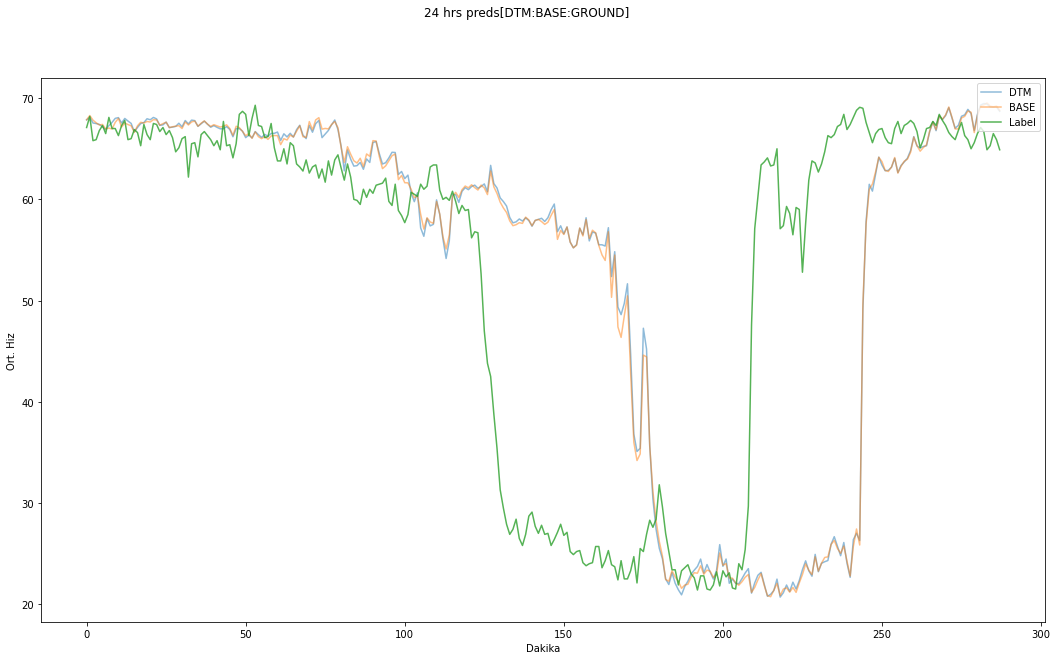

In [23]:
# Matplotlib 
OFFSET = 80
TIME_STEP = 12
SENSOR_ID = 26
TIME_PERIOD = 24*TIME_STEP+OFFSET
plt.figure(figsize=(18, 10))
plt.plot(dtm_pred[0,OFFSET:TIME_PERIOD,SENSOR_ID], alpha=0.5, label="DTM")
plt.plot(base_pred[0,OFFSET:TIME_PERIOD,SENSOR_ID], alpha=0.5, label="BASE")
plt.plot(label[0,OFFSET:TIME_PERIOD,SENSOR_ID], alpha=0.8, label="Label")
plt.gca().legend(loc="upper right")
plt.suptitle('24 hrs preds[DTM:BASE:GROUND]')
plt.ylabel("Ort. Hiz")
plt.xlabel("Dakika")
plt.savefig(f"figures/24HrsPrediction_{SENSOR_ID}.png",dpi=450)
plt.show()

# Histogram

In [25]:
# First reshape predictions and labels
dtm_pred_flat = dtm_pred.reshape((dtm_pred.shape[0]*dtm_pred.shape[1]*dtm_pred.shape[2],))
base_pred_flat = base_pred.reshape((base_pred.shape[0]*base_pred.shape[1]*base_pred.shape[2],))
label_flat = label[:,:5248,:].reshape((label.shape[0]*label[:,:5248,:].shape[1]*label.shape[2],))


In [26]:
dtm_pred_flat.shape, base_pred_flat.shape, label_flat.shape

((20467200,), (20467200,), (20467200,))

In [27]:
dtm_absolute_error = np.abs(label_flat-dtm_pred_flat)
base_absolute_error = np.abs(label_flat-base_pred_flat)
base_absolute_error, dtm_absolute_error

(array([ 2.24936523, 39.56016769,  6.49110565, ...,  1.6658844 ,
         2.00946808,  1.80059967]),
 array([ 2.18922272, 39.76402893,  6.5969902 , ...,  1.04814758,
         1.6570816 ,  0.74835358]))

In [28]:
dtm_absolute_error_sq = np.square(dtm_absolute_error)
base_absolute_error_sq = np.square(base_absolute_error)

In [38]:
max(base_absolute_error), max(dtm_absolute_error), max(dtm_absolute_error_sq), max(base_absolute_error_sq)

(66.0537094116211, 68.03393096923827, 4628.615763127078, 4363.092527034882)

In [31]:
import decimal
def drange(x,y,jump):
    while x < y:
        yield float(x)
        x += decimal.Decimal(jump)


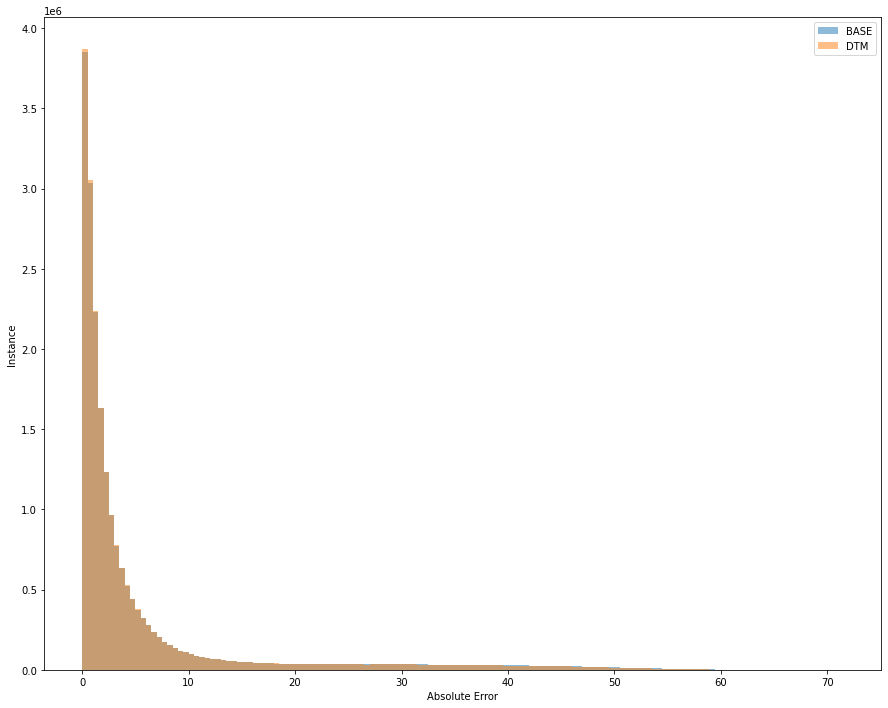

In [43]:
FROM = 0
TO = 72
STEP = '0.5'
rng = list(drange(FROM,TO,STEP))
fig, ax = plt.subplots(figsize=(15,12))
ax.hist(base_absolute_error, alpha=0.5, bins = rng, label="BASE")
ax.hist(dtm_absolute_error, alpha=0.5, bins = rng, label="DTM")
plt.gca().legend(loc="upper right")
plt.ylabel("Instance")
plt.xlabel("Absolute Error")
plt.savefig(f"figures/ErrorHist_{FROM}-{TO}_{STEP}.png",dpi=1000)
plt.show()

In [68]:
FROM = 0
TO = 2
STEP = '0.02'
STEP_OFFSET = 0.25
rng = list(drange(FROM,TO,STEP))
for i in range(len(rng)):
    rng[i] += STEP_OFFSET

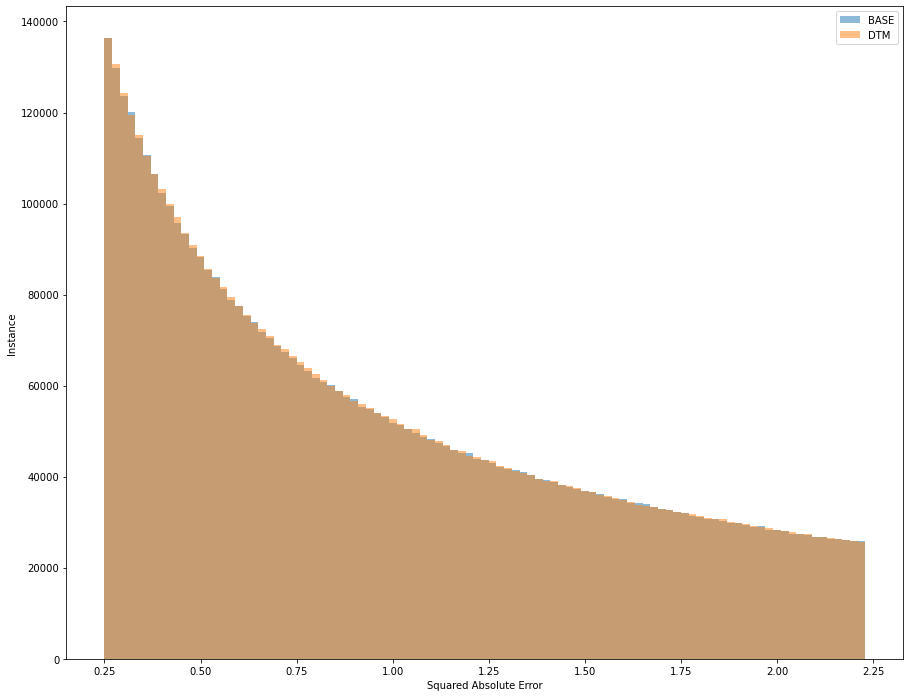

In [67]:
fig, ax = plt.subplots(figsize=(15,12))
ax.hist(base_absolute_error_sq, alpha=0.5, bins = rng, label="BASE")
ax.hist(dtm_absolute_error_sq, alpha=0.5, bins = rng, label="DTM")
plt.gca().legend(loc="upper right")
plt.ylabel("Instance")
plt.xlabel("Squared Absolute Error")
plt.savefig(f"figures/ErrorHistSquarred_{FROM}-{TO}_{STEP}.png",dpi=1000)
plt.show()